# STATISTICAL METHOD (SM) PROJECT 2
#### Statement: Comparing the Dispersion in Salaries Among Male and Female Employees in Various Industries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('salary_data_detailed.csv')

df.head()

,Industry,Gender,Job Title,Years of Experience,Location,Salary
0,Tech,Male,Software Engineer,5,Bangalore,65000
1,Finance,Female,Analyst,3,Mumbai,48000
2,Healthcare,Female,Nurse,7,Delhi,52000
3,Education,Male,Teacher,10,Hyderabad,43000
4,Manufacturing,Male,Technician,8,Pune,59000


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Industry             128 non-null    object
 1   Gender               128 non-null    object
 2   Job Title            128 non-null    object
 3   Years of Experience  128 non-null    int64 
 4   Location             128 non-null    object
 5   Salary               128 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 6.1+ KB
None


In [10]:
# Calculate mean, median, and mode for male and female salaries in each industry
mean_salary = df.groupby(['Industry', 'Gender'])['Salary'].mean()
median_salary = df.groupby(['Industry', 'Gender'])['Salary'].median()
mode_salary = df.groupby(['Industry', 'Gender'])['Salary'].agg(lambda x: x.mode()[0])

# Combine into a single DataFrame
descriptive_stats = pd.DataFrame({
    'Mean Salary': mean_salary,
    'Median Salary': median_salary,
    'Mode Salary': mode_salary
})
descriptive_stats

Mean Salary  Median Salary  Mode Salary
Industry      Gender                                          
Education     Female  41153.846154        41000.0        41000
              Male    43333.333333        42000.0        39000
Finance       Female  49928.571429        49000.0        47000
              Male    50833.333333        50000.0        50000
Healthcare    Female  51875.000000        51500.0        51000
              Male    60111.111111        60000.0        60000
Manufacturing Female  45333.333333        45000.0        44000
              Male    57076.923077        58000.0        58000
Tech          Female  67777.777778        68000.0        68000
              Male    66888.888889        68000.0        65000

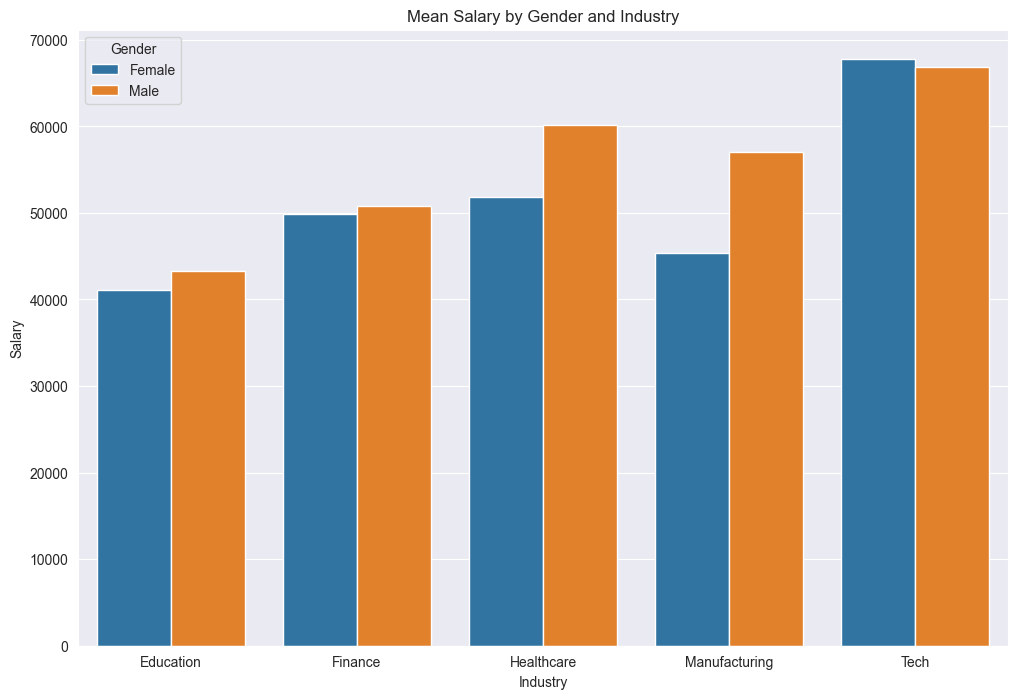

In [18]:
# Bar graph for mean salaries by gender and industry
mean_salaries_by_industry = df.groupby(['Industry', 'Gender'])['Salary'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Industry', y='Salary', hue='Gender', data=mean_salaries_by_industry)
plt.title('Mean Salary by Gender and Industry')
plt.show()


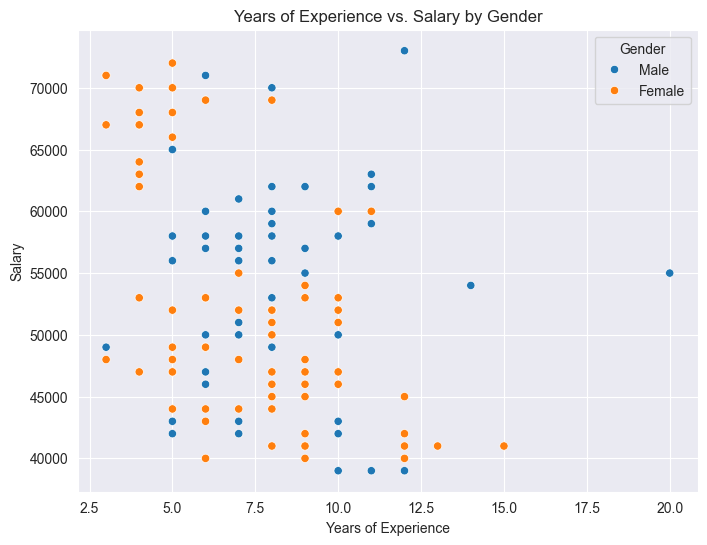

In [21]:
# Simple Scatter plot for Years of Experience vs. Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Gender', data=df)
plt.title('Years of Experience vs. Salary by Gender')
plt.show()


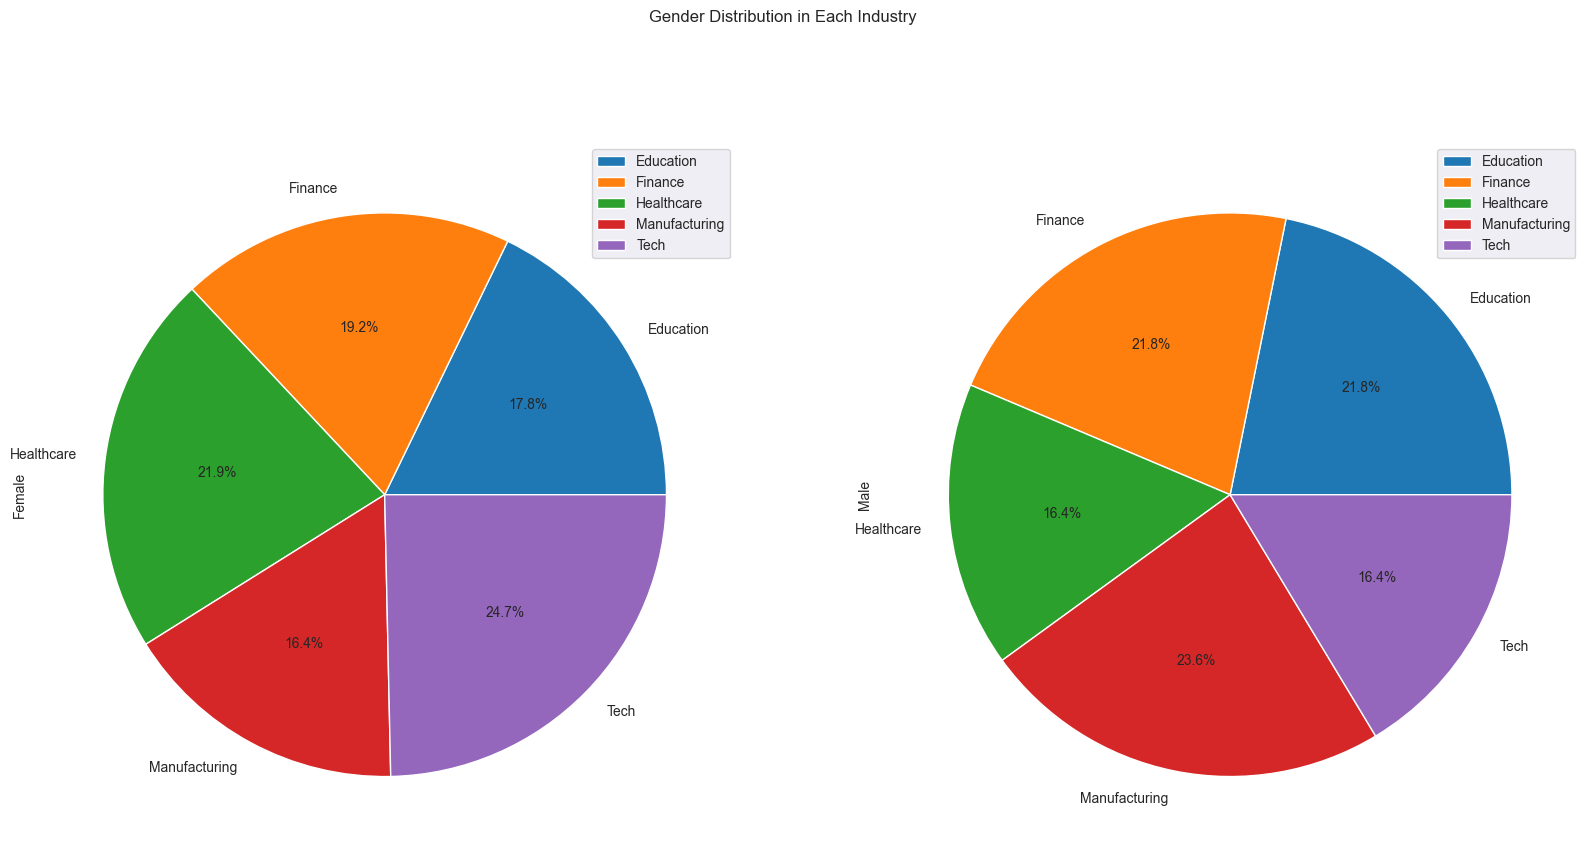

In [27]:
# Pie chart for gender distribution in each industry
industry_gender_distribution = df.groupby(['Industry', 'Gender']).size().unstack()

industry_gender_distribution.plot(kind='pie', subplots=True, figsize=(20, 10), autopct='%1.1f%%')
plt.suptitle('Gender Distribution in Each Industry')
plt.show()
